In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('banking-data.csv')
print("Thông tin dữ liệu:")
print(df.shape)
print(df.columns.tolist())
print(df.head(10).to_string())

Thông tin dữ liệu:
(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
   age           job   marital  education default  balance housing loan  contact  day month  duration  campaign  pdays  previous poutcome   y
0   58    management   married   tertiary      no     2143     yes   no  unknown    5   may       261         1     -1         0  unknown  no
1   44    technician    single  secondary      no       29     yes   no  unknown    5   may       151         1     -1         0  unknown  no
2   33  entrepreneur   married  secondary      no        2     yes  yes  unknown    5   may        76         1     -1         0  unknown  no
3   47   blue-collar   married    unknown      no     1506     yes   no  unknown    5   may        92         1     -1         0  unknown  no
4   33       unknown    single    unknown      no        1      no   no  unknown    5   ma

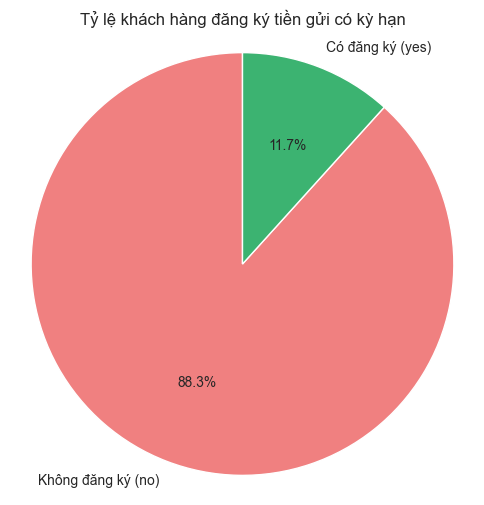

Số lượng theo nhóm:
y
no     39922
yes     5289
Name: count, dtype: int64


In [3]:
target_counts = df['y'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=['Không đăng ký (no)', 'Có đăng ký (yes)'],
        autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'mediumseagreen'])
plt.title('Tỷ lệ khách hàng đăng ký tiền gửi có kỳ hạn')
plt.axis('equal')
plt.show()

print(f"Số lượng theo nhóm:\n{target_counts}")

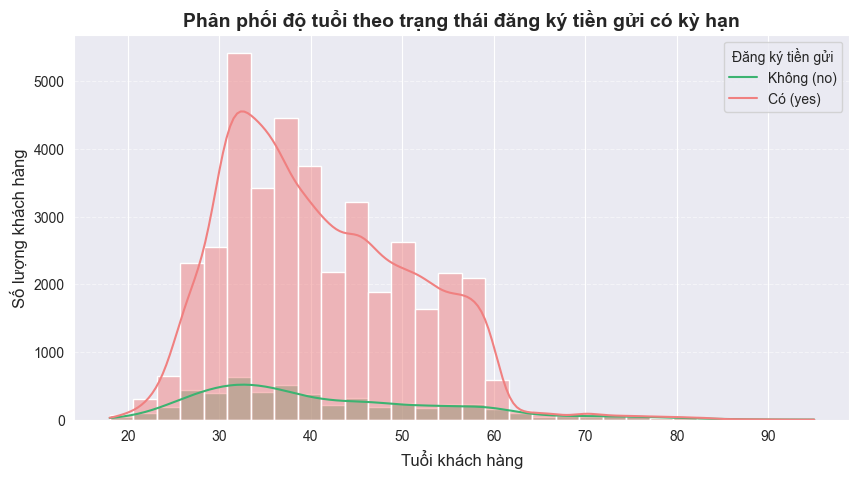

In [4]:
# Biểu đồ tuổi theo trạng thái đăng ký
# Biểu đồ tuổi (age) theo trạng thái đăng ký
# age: Tuổi của khách hàng
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='y', bins=30, kde=True, palette=['lightcoral', 'mediumseagreen'])
plt.title('Phân phối độ tuổi theo trạng thái đăng ký tiền gửi có kỳ hạn', fontsize=14, fontweight='bold')
plt.xlabel('Tuổi khách hàng', fontsize=12)
plt.ylabel('Số lượng khách hàng', fontsize=12)
plt.legend(title='Đăng ký tiền gửi', labels=['Không (no)', 'Có (yes)'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

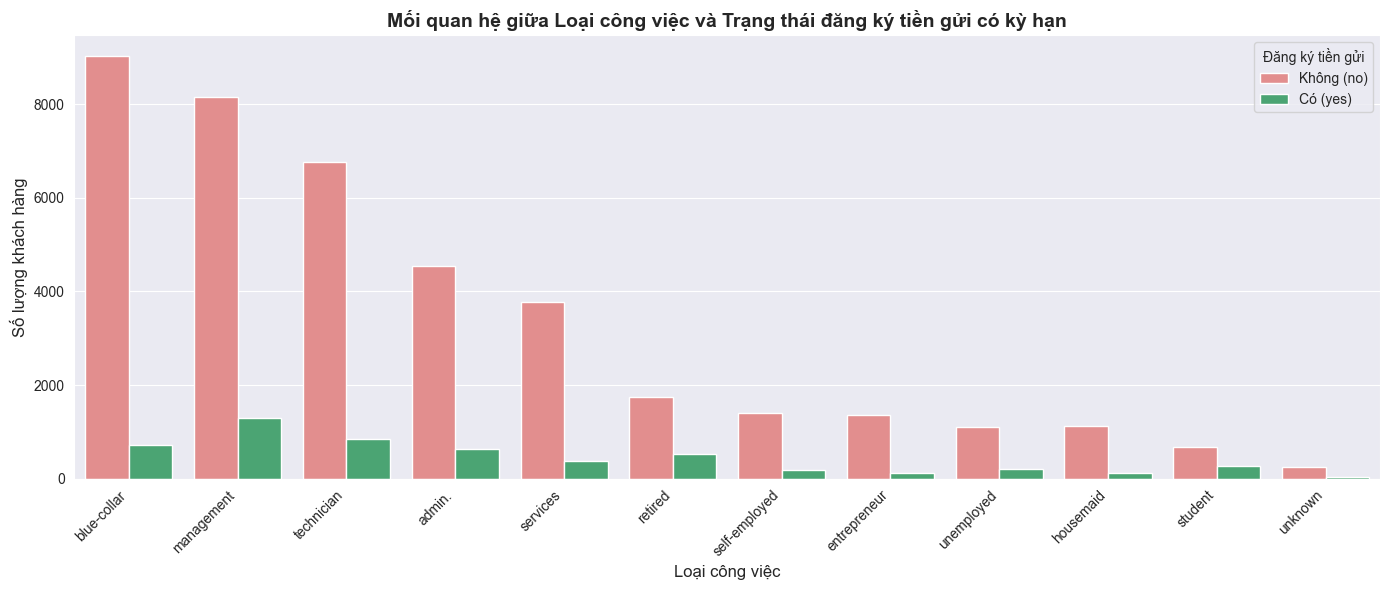

In [5]:
# Biểu đồ loại công việc (job) theo trạng thái đăng ký
# job: Loại công việc (admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='job', hue='y', order=df['job'].value_counts().index,
              palette=['lightcoral', 'mediumseagreen'])
plt.title('Mối quan hệ giữa Loại công việc và Trạng thái đăng ký tiền gửi có kỳ hạn', fontsize=14, fontweight='bold')
plt.xlabel('Loại công việc', fontsize=12)
plt.ylabel('Số lượng khách hàng', fontsize=12)
plt.legend(title='Đăng ký tiền gửi', labels=['Không (no)', 'Có (yes)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

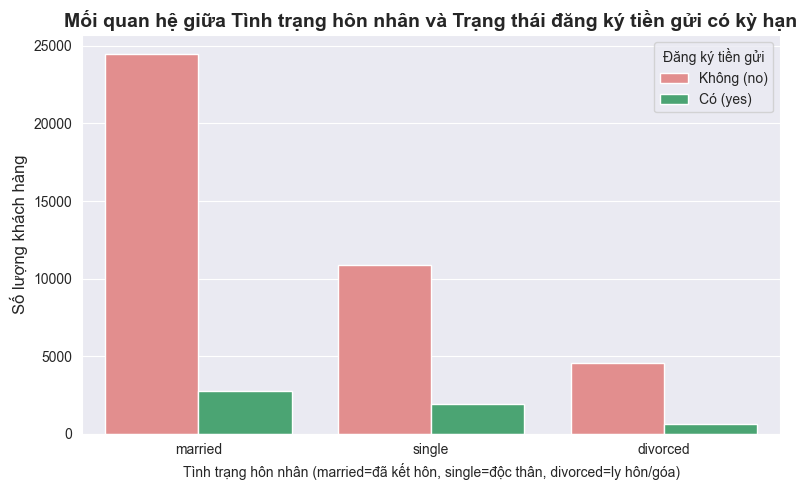

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='marital', hue='y', order=df['marital'].value_counts().index,
              palette=['lightcoral', 'mediumseagreen'])
plt.title('Mối quan hệ giữa Tình trạng hôn nhân và Trạng thái đăng ký tiền gửi có kỳ hạn', fontsize=14, fontweight='bold')
plt.xlabel('Tình trạng hôn nhân (married=đã kết hôn, single=độc thân, divorced=ly hôn/góa)', fontsize=10)
plt.ylabel('Số lượng khách hàng', fontsize=12)
plt.legend(title='Đăng ký tiền gửi', labels=['Không (no)', 'Có (yes)'])
plt.tight_layout()
plt.show()

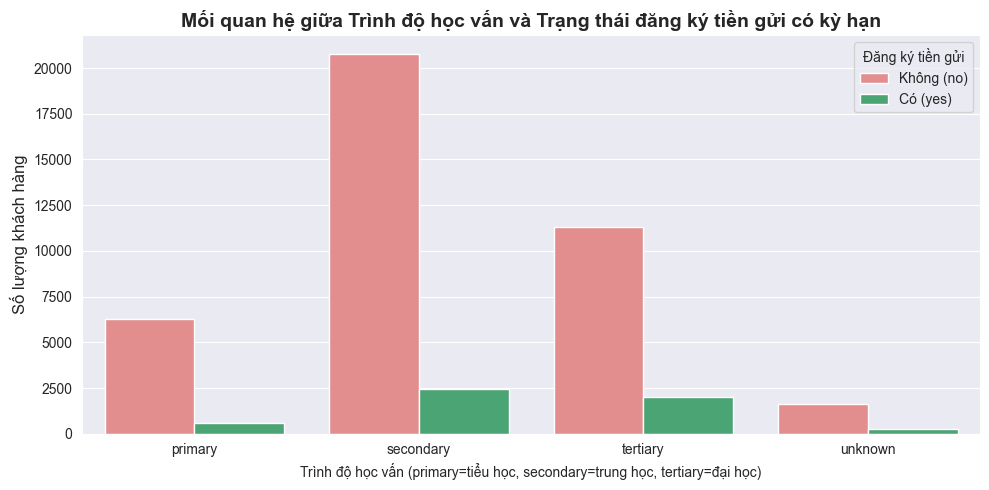

In [7]:
# Biểu đồ trình độ học vấn (education) theo trạng thái đăng ký
# education: Trình độ học vấn (primary=tiểu học, secondary=trung học, tertiary=đại học/cao đẳng, unknown=không rõ)
plt.figure(figsize=(10, 5))
education_order = ['primary', 'secondary', 'tertiary', 'unknown']
sns.countplot(data=df, x='education', hue='y', order=education_order,
              palette=['lightcoral', 'mediumseagreen'])
plt.title('Mối quan hệ giữa Trình độ học vấn và Trạng thái đăng ký tiền gửi có kỳ hạn', fontsize=14, fontweight='bold')
plt.xlabel('Trình độ học vấn (primary=tiểu học, secondary=trung học, tertiary=đại học)', fontsize=10)
plt.ylabel('Số lượng khách hàng', fontsize=12)
plt.legend(title='Đăng ký tiền gửi', labels=['Không (no)', 'Có (yes)'])
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

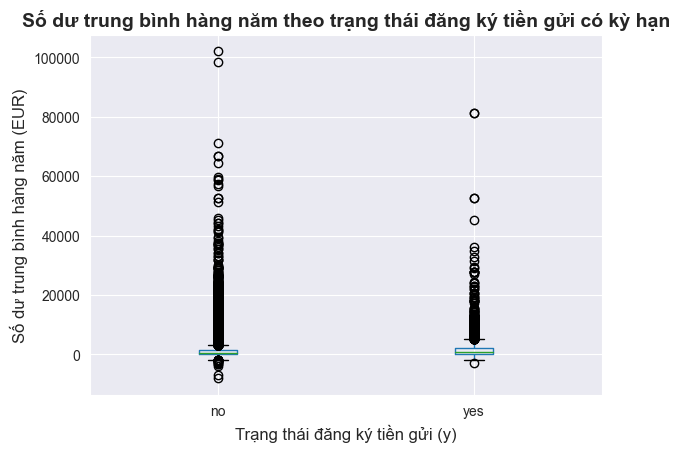

In [8]:
# Boxplot số dư trung bình hàng năm (balance) theo trạng thái đăng ký
# balance: Số dư trung bình hàng năm tính bằng EUR
plt.figure(figsize=(8, 5))
df.boxplot(column='balance', by='y')
plt.title('Số dư trung bình hàng năm theo trạng thái đăng ký tiền gửi có kỳ hạn', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Trạng thái đăng ký tiền gửi (y)', fontsize=12)
plt.ylabel('Số dư trung bình hàng năm (EUR)', fontsize=12)
plt.show()

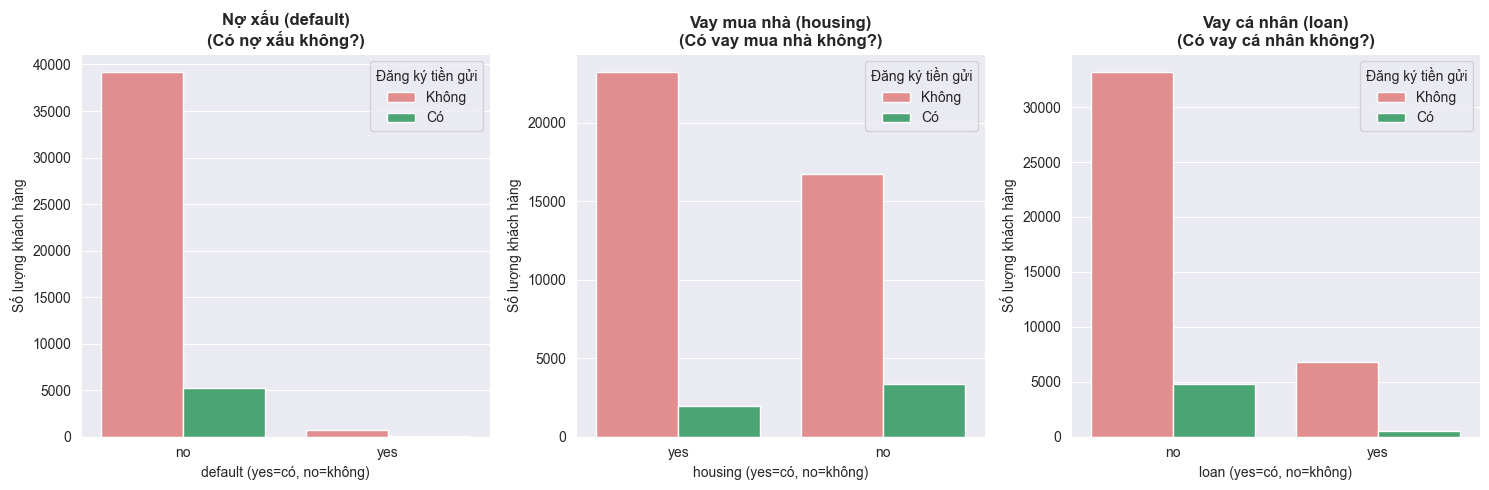

In [9]:
# Biểu đồ các biến nhị phân về tình trạng tài chính
# default: Có nợ xấu (credit in default) không?
# housing: Có vay mua nhà (housing loan) không?
# loan: Có vay cá nhân (personal loan) không?

binary_cols = ['default', 'housing', 'loan']
titles = ['Nợ xấu (default)', 'Vay mua nhà (housing)', 'Vay cá nhân (loan)']
descriptions = ['Có nợ xấu không?', 'Có vay mua nhà không?', 'Có vay cá nhân không?']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (col, title, desc) in enumerate(zip(binary_cols, titles, descriptions)):
    sns.countplot(data=df, x=col, hue='y', ax=axes[i],
                  palette=['lightcoral', 'mediumseagreen'])
    axes[i].set_title(f'{title}\n({desc})', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(f'{col} (yes=có, no=không)', fontsize=10)
    axes[i].set_ylabel('Số lượng khách hàng', fontsize=10)
    axes[i].legend(title='Đăng ký tiền gửi', labels=['Không', 'Có'])

plt.tight_layout()
plt.show()

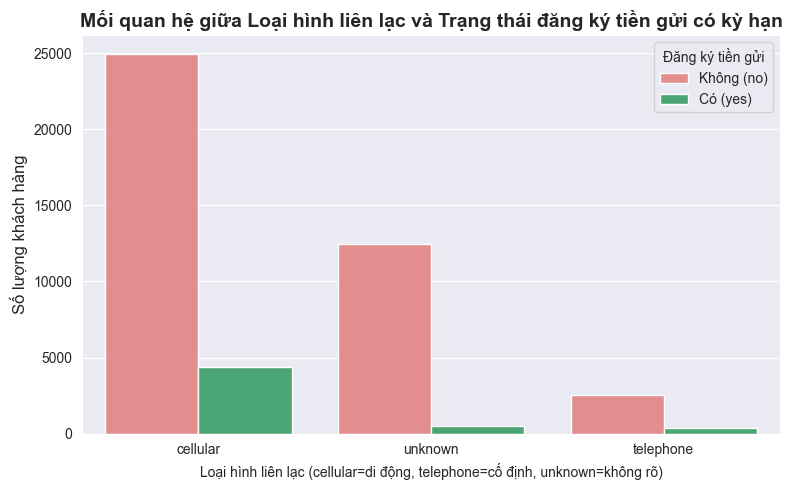

In [10]:
# contact: Loại hình liên lạc (cellular=điện thoại di động, telephone=điện thoại cố định, unknown=không rõ)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='contact', hue='y', order=df['contact'].value_counts().index,
              palette=['lightcoral', 'mediumseagreen'])
plt.title('Mối quan hệ giữa Loại hình liên lạc và Trạng thái đăng ký tiền gửi có kỳ hạn', fontsize=14, fontweight='bold')
plt.xlabel('Loại hình liên lạc (cellular=di động, telephone=cố định, unknown=không rõ)', fontsize=10)
plt.ylabel('Số lượng khách hàng', fontsize=12)
plt.legend(title='Đăng ký tiền gửi', labels=['Không (no)', 'Có (yes)'])
plt.tight_layout()
plt.show()

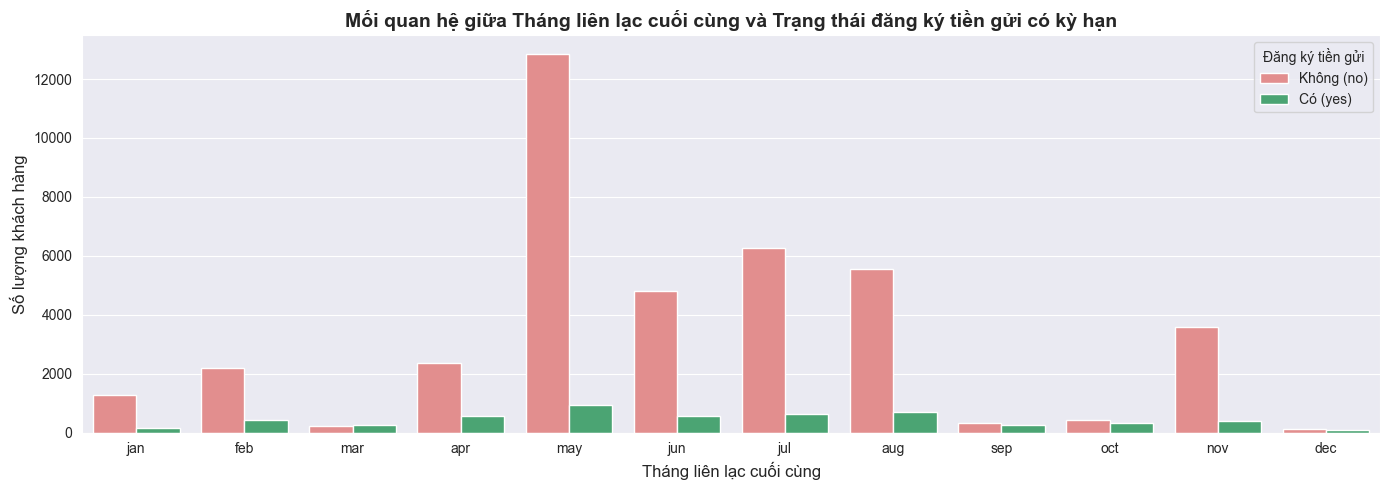

In [11]:
# Biểu đồ tháng liên lạc cuối cùng (month) theo trạng thái đăng ký
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.figure(figsize=(14, 5))
sns.countplot(data=df, x='month', hue='y', order=month_order,
              palette=['lightcoral', 'mediumseagreen'])
plt.title('Mối quan hệ giữa Tháng liên lạc cuối cùng và Trạng thái đăng ký tiền gửi có kỳ hạn', fontsize=14, fontweight='bold')
plt.xlabel('Tháng liên lạc cuối cùng', fontsize=12)
plt.ylabel('Số lượng khách hàng', fontsize=12)
plt.legend(title='Đăng ký tiền gửi', labels=['Không (no)', 'Có (yes)'])
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

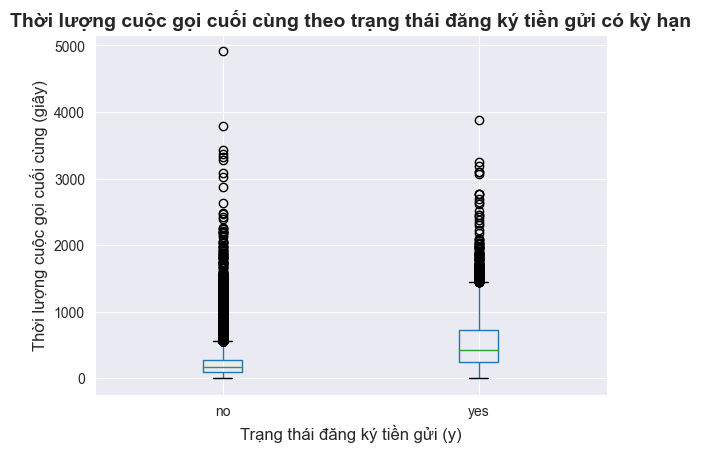

In [12]:
# Boxplot thời lượng cuộc gọi cuối cùng (duration) theo trạng thái đăng ký
# duration: Thời lượng cuộc gọi cuối cùng, tính bằng giây
# Lưu ý: Biến này ảnh hưởng nhiều đến kết quả đầu ra. Nếu duration=0 thì y='no'
plt.figure(figsize=(8, 5))
df.boxplot(column='duration', by='y')
plt.title('Thời lượng cuộc gọi cuối cùng theo trạng thái đăng ký tiền gửi có kỳ hạn', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Trạng thái đăng ký tiền gửi (y)', fontsize=12)
plt.ylabel('Thời lượng cuộc gọi cuối cùng (giây)', fontsize=12)
plt.show()

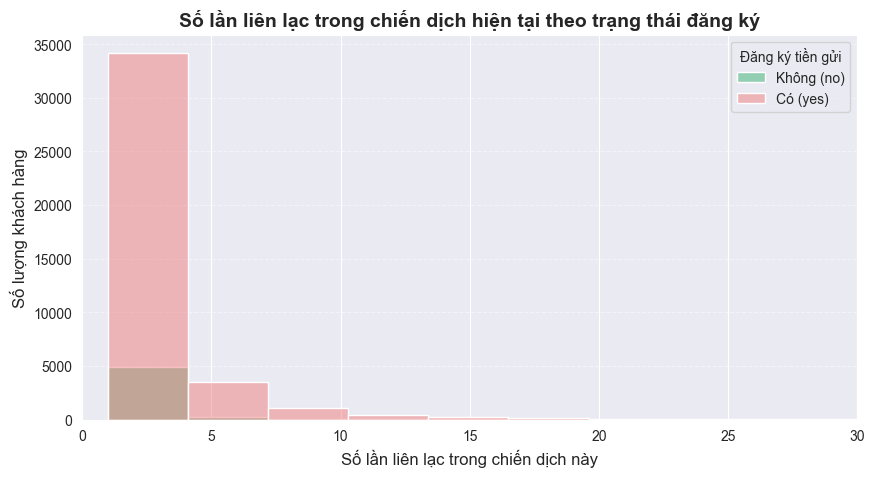

In [13]:
# Biểu đồ số lần liên lạc trong chiến dịch hiện tại (campaign) theo trạng thái đăng ký
# campaign: Số lần liên lạc được thực hiện trong chiến dịch này cho khách hàng (bao gồm cả cuộc gọi cuối)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='campaign', hue='y', bins=20, kde=False,
             palette=['lightcoral', 'mediumseagreen'])
plt.title('Số lần liên lạc trong chiến dịch hiện tại theo trạng thái đăng ký', fontsize=14, fontweight='bold')
plt.xlabel('Số lần liên lạc trong chiến dịch này', fontsize=12)
plt.ylabel('Số lượng khách hàng', fontsize=12)
plt.xlim(0, 30)  # Giới hạn để nhìn rõ hơn
plt.legend(title='Đăng ký tiền gửi', labels=['Không (no)', 'Có (yes)'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

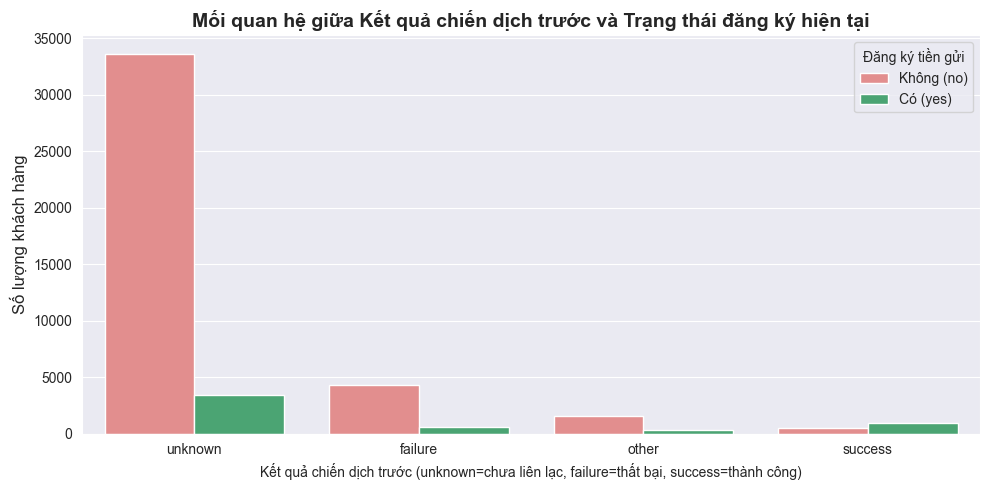

In [14]:
# Biểu đồ kết quả chiến dịch marketing trước đó (poutcome) theo trạng thái đăng ký
# poutcome: Kết quả của chiến dịch marketing trước (unknown=không rõ/chưa liên lạc, failure=thất bại, other=khác, success=thành công)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='poutcome', hue='y', order=df['poutcome'].value_counts().index,
              palette=['lightcoral', 'mediumseagreen'])
plt.title('Mối quan hệ giữa Kết quả chiến dịch trước và Trạng thái đăng ký hiện tại', fontsize=14, fontweight='bold')
plt.xlabel('Kết quả chiến dịch trước (unknown=chưa liên lạc, failure=thất bại, success=thành công)', fontsize=10)
plt.ylabel('Số lượng khách hàng', fontsize=12)
plt.legend(title='Đăng ký tiền gửi', labels=['Không (no)', 'Có (yes)'])
plt.tight_layout()
plt.show()

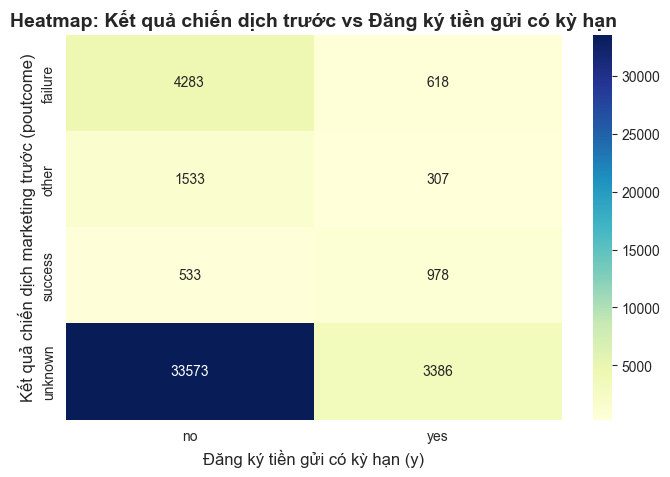

In [15]:
# Heatmap thể hiện mối quan hệ giữa kết quả chiến dịch trước (poutcome) và đăng ký hiện tại (y)
heatmap_data = pd.crosstab(df['poutcome'], df['y'])

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap: Kết quả chiến dịch trước vs Đăng ký tiền gửi có kỳ hạn', fontsize=14, fontweight='bold')
plt.xlabel('Đăng ký tiền gửi có kỳ hạn (y)', fontsize=12)
plt.ylabel('Kết quả chiến dịch marketing trước (poutcome)', fontsize=12)
plt.show()

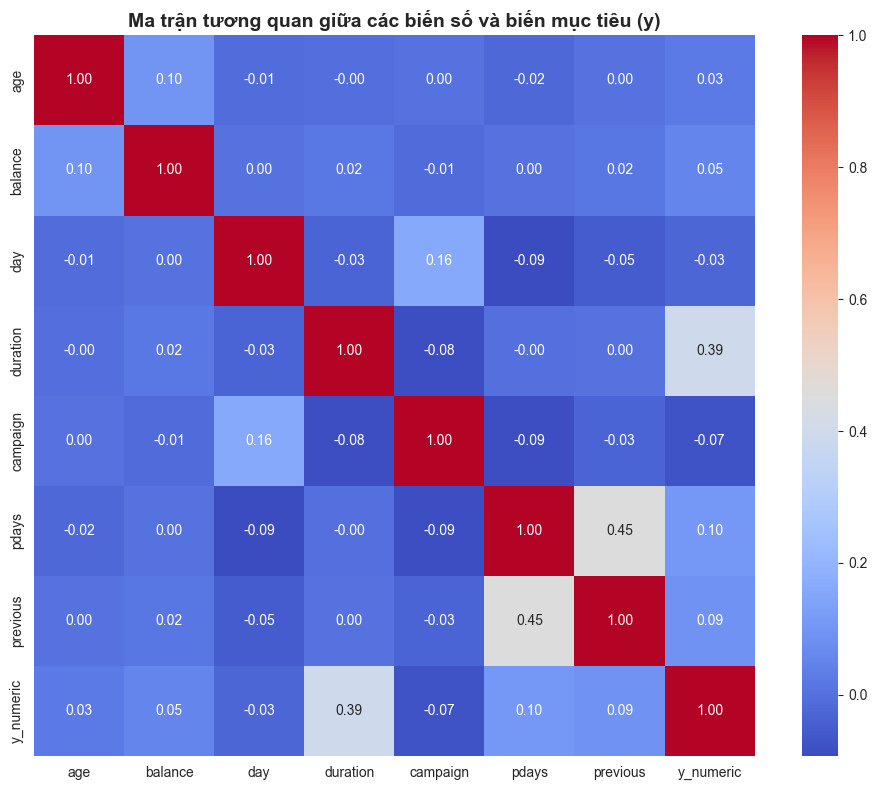

In [16]:
# Ma trận tương quan giữa các biến số và biến mục tiêu
# Chuyển đổi biến mục tiêu y thành số để tính tương quan
df_numeric = df.copy()
df_numeric['y_numeric'] = df_numeric['y'].map({'yes': 1, 'no': 0})

# Các biến số:
# age: Tuổi
# balance: Số dư trung bình hàng năm (EUR)
# day: Ngày liên lạc cuối trong tháng
# duration: Thời lượng cuộc gọi cuối (giây)
# campaign: Số lần liên lạc trong chiến dịch này
# pdays: Số ngày từ lần liên lạc trước (-1 = chưa từng liên lạc)
# previous: Số lần liên lạc trước chiến dịch này
# y_numeric: Đăng ký tiền gửi có kỳ hạn (1=yes, 0=no)

numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_numeric']
correlation_matrix = df_numeric[numeric_cols].corr()

# Vẽ heatmap tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            cbar=True, square=True, annot_kws={"size": 10})
plt.title('Ma trận tương quan giữa các biến số và biến mục tiêu (y)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

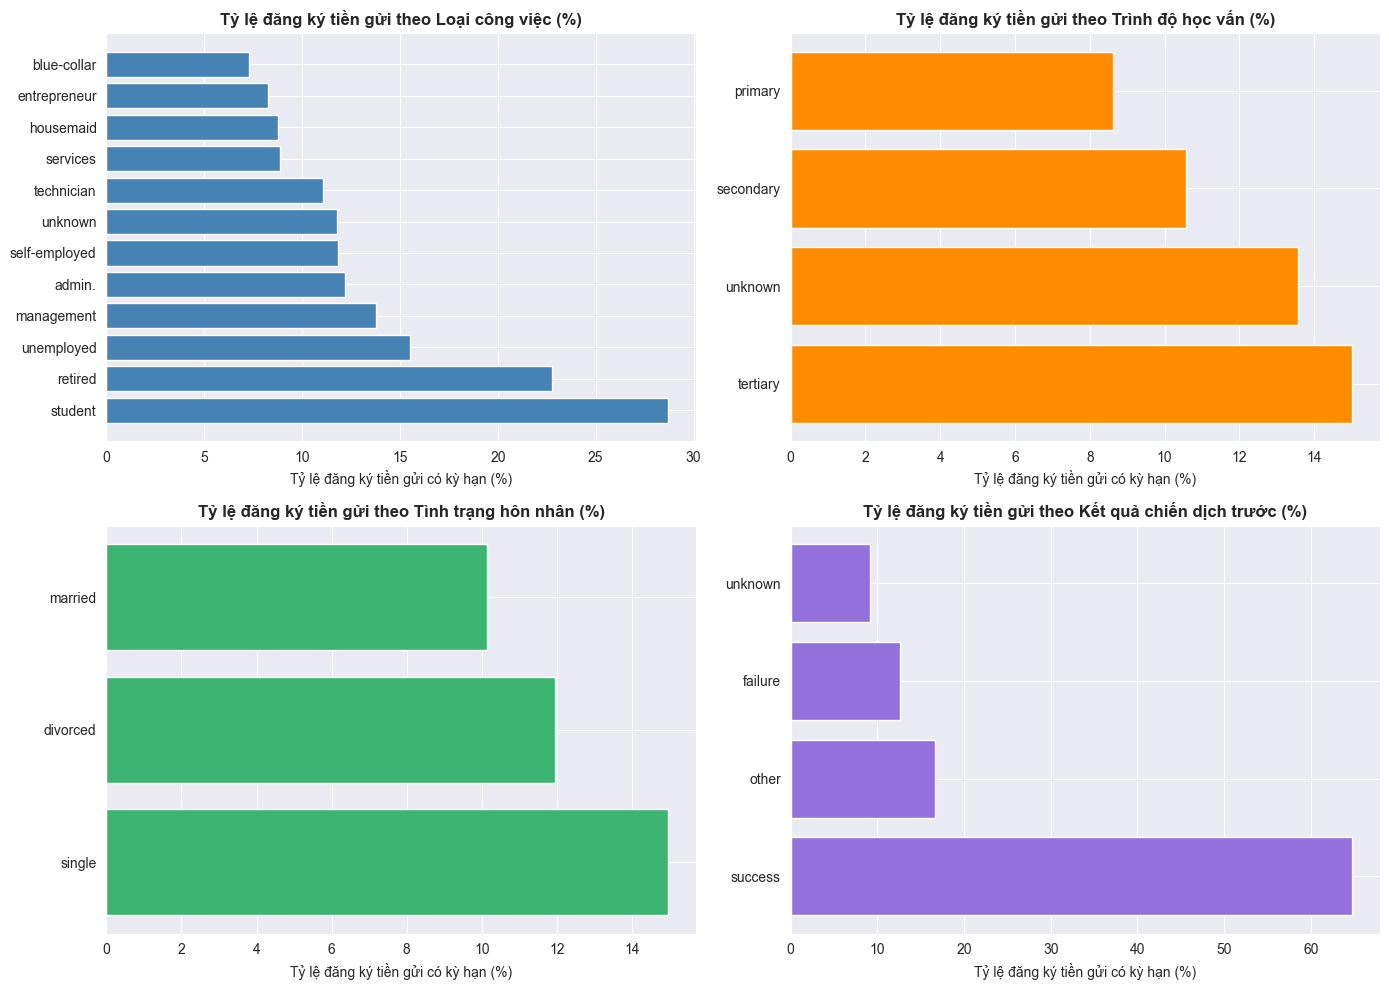

In [17]:
# Biểu đồ tổng hợp: Tỷ lệ đăng ký tiền gửi có kỳ hạn theo các biến phân loại chính
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Tỷ lệ đăng ký theo loại công việc (job)
job_rate = df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean() * 100).sort_values(ascending=False)
axes[0, 0].barh(job_rate.index, job_rate.values, color='steelblue')
axes[0, 0].set_title('Tỷ lệ đăng ký tiền gửi theo Loại công việc (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Tỷ lệ đăng ký tiền gửi có kỳ hạn (%)')

# 2. Tỷ lệ đăng ký theo trình độ học vấn (education)
edu_rate = df.groupby('education')['y'].apply(lambda x: (x == 'yes').mean() * 100).sort_values(ascending=False)
axes[0, 1].barh(edu_rate.index, edu_rate.values, color='darkorange')
axes[0, 1].set_title('Tỷ lệ đăng ký tiền gửi theo Trình độ học vấn (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Tỷ lệ đăng ký tiền gửi có kỳ hạn (%)')

# 3. Tỷ lệ đăng ký theo tình trạng hôn nhân (marital)
marital_rate = df.groupby('marital')['y'].apply(lambda x: (x == 'yes').mean() * 100).sort_values(ascending=False)
axes[1, 0].barh(marital_rate.index, marital_rate.values, color='mediumseagreen')
axes[1, 0].set_title('Tỷ lệ đăng ký tiền gửi theo Tình trạng hôn nhân (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Tỷ lệ đăng ký tiền gửi có kỳ hạn (%)')

# 4. Tỷ lệ đăng ký theo kết quả chiến dịch trước (poutcome)
poutcome_rate = df.groupby('poutcome')['y'].apply(lambda x: (x == 'yes').mean() * 100).sort_values(ascending=False)
axes[1, 1].barh(poutcome_rate.index, poutcome_rate.values, color='mediumpurple')
axes[1, 1].set_title('Tỷ lệ đăng ký tiền gửi theo Kết quả chiến dịch trước (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Tỷ lệ đăng ký tiền gửi có kỳ hạn (%)')

plt.tight_layout()
plt.show()